#### 설정

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from pathlib import Path

In [23]:
# Add every font at the specified location
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'Nanum Pen'
print(mpl.rcParams['font.family'])
# 유니코드에서 음수 부호설정
mpl.rc('axes', unicode_minus=False)

Nanum Pen
NanumGothic
['Nanum Pen']


In [24]:
# 그래프 출력이 안될 시
%matplotlib inline

# Wordcloud

### conda에 wordcloud 설치하기

conda install -c conda-forge wordcloud

In [2]:
from wordcloud import WordCloud

### Stack Overflow Annual Developer Survey 데이터 불러오기

In [7]:
survey_df = pd.read_csv("data/survey_results_public.csv", index_col="ResponseId")

### 데이터 가공하기

In [11]:
survey_df.DevType
temp_words = survey_df.DevType.dropna()
temp_words

ResponseId
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
8                            Developer, full-stack;Student
9                                      Developer, back-end
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 61302, dtype: object

In [17]:
temp_words = temp_words.str.replace(';', ' ').str.replace(',', ' ')
temp_words

ResponseId
3        Data scientist or machine learning specialist ...
4                                    Developer  full-stack
5        Developer  front-end Developer  full-stack Dev...
8                            Developer  full-stack Student
9                                      Developer  back-end
                               ...                        
73264                                  Developer  back-end
73265        Data scientist or machine learning specialist
73266    Developer  full-stack Developer  desktop or en...
73267    Developer  front-end Developer  desktop or ent...
73268    Developer  front-end Engineer  data Engineer  ...
Name: DevType, Length: 61302, dtype: object

In [20]:
words  = ' '.join(temp_words)
words

'Data scientist or machine learning specialist Developer  front-end Engineer  data Engineer  site reliability Developer  full-stack Developer  front-end Developer  full-stack Developer  back-end Developer  desktop or enterprise applications Developer  QA or test Developer  full-stack Student Developer  back-end Developer  desktop or enterprise applications Developer  mobile Educator Developer  full-stack Developer  back-end Engineering manager Developer  full-stack Developer  front-end Developer  full-stack Developer  back-end Database administrator Developer  full-stack Academic researcher DevOps specialist Developer  full-stack Developer  full-stack Engineer  data Developer  back-end Developer  desktop or enterprise applications Student Developer  full-stack Developer  back-end Other (please specify): Developer  full-stack Developer  back-end Developer  mobile Developer  full-stack Developer  back-end Developer  desktop or enterprise applications Developer  embedded applications or d

### word cloud 생성 후 그림으로 출력하기

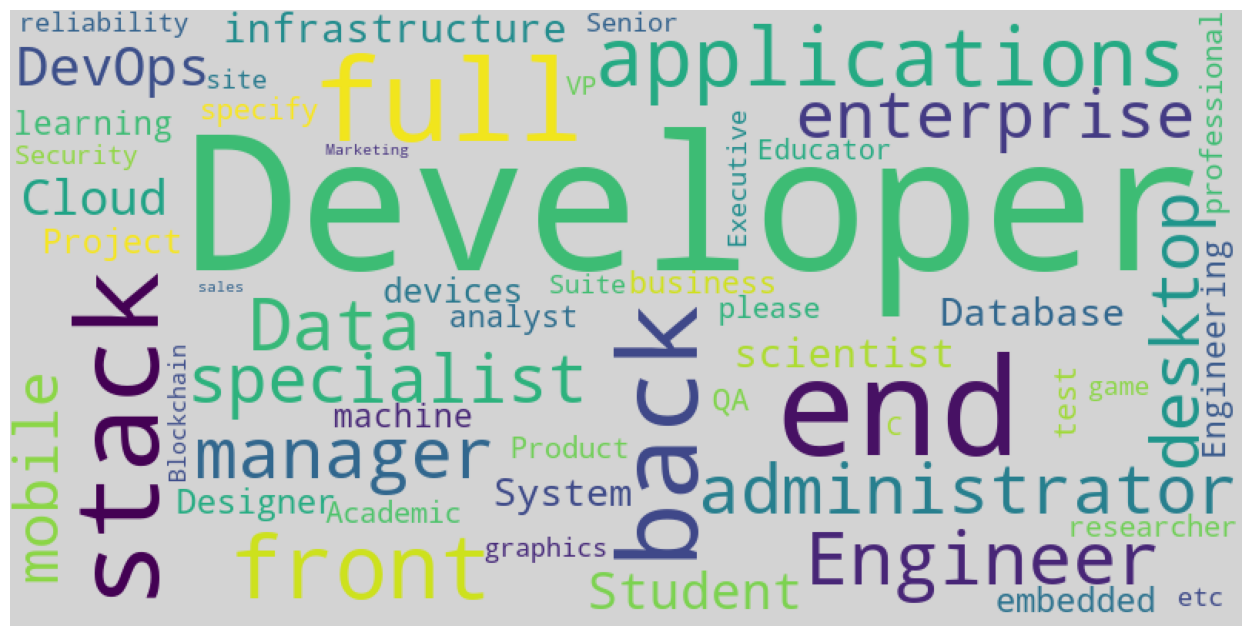

In [26]:
# 한글이 포함되었다면 한글 폰트를 지정해야 한다.
#  font_path=['폰트 경로']
# max_font_size=60 --> 최대 글자 크기를 지정한다.
wc = WordCloud(collocation_threshold=int(1e6),
               width=800, height=400,
               background_color='lightgrey').generate(words)

plt.figure(figsize=(16, 8))

# x, y축을 그리지 않습니다.
plt.axis("off")

# grid lines를 그리지 않습니다.
plt.grid(False)
plt.imshow(wc)
plt.show()

### 그림저장하기

In [28]:
wc.to_file("DevType.png")